# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# load dataset
retail_data = pd.read_excel("Online Retail.xlsx")


In [4]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Task 2: Clean the Data

In [5]:
# Overview of data
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# identify missing data
retail_data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Since the 'CustomerID' column contains too many missing values, it is better to drop the column entirely from our analysis.
As for the 'Description' column, a relatively small number of data is missing therefore we can drop the rows with missing data.

In [7]:
# Drop the CustomerID column
df_clean = retail_data.drop("CustomerID", axis=1)

In [8]:
#Drop rows with missing Description
df_clean.dropna(inplace=True)

In [9]:
# Confirm data has no missing values
df_clean.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [10]:
# Identify duplicated rows
df_clean.duplicated().sum()

5268

There are 5268 duplicated rows in the dataset. 

In [11]:
# Remove duplicated data.
df_clean.drop_duplicates(inplace= True)

In [12]:
# Confirm no more duplicates
df_clean.duplicated().sum()

0

## Task 3: Calculate basic statistics

In [13]:
# Add useful columns
df_clean["Sales"] = df_clean.Quantity * df_clean.UnitPrice
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


In [14]:
# Get basic statitstics for the data
df_clean.describe()

,Quantity,UnitPrice,Sales
count,535187.000000,535187.000000,535187.000000
mean,9.671593,4.645242,18.173100
std,219.059056,97.364810,381.171824
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.900000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000


There are some extreme values that appear to be skewing our results.

In [15]:
# Using Inter Quartile Range to handle outliers.
columns = ["Quantity", "UnitPrice", "Sales"]

for column in columns:
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
df_clean.describe()

###########

,Quantity,UnitPrice,Sales
count,425901.000000,425901.000000,425901.000000
mean,4.551262,2.701718,9.123070
std,4.316343,1.993397,7.561331
min,-12.000000,0.000000,-14.750000
25%,1.000000,1.250000,2.950000
50%,3.000000,2.080000,6.640000
75%,6.000000,3.750000,15.000000
max,23.000000,8.620000,33.300000


In [16]:
# Investigate negative quantity entries
neg_quantity = df_clean[(df_clean.Sales < 0)]
print(neg_quantity["Description"].unique())

['SET OF 3 COLOURED  FLYING DUCKS' 'HAND WARMER RED RETROSPOT'
 'CHARLOTTE BAG SUKI DESIGN' ... 'ELEPHANT BIRTHDAY CARD '
 'AFGHAN SLIPPER SOCK PAIR' 'PIZZA PLATE IN BOX']


In [17]:
# Correct negative quantity and Sales by making them positive
df_clean["Quantity"] = df_clean["Quantity"].abs()
df_clean["Sales"] = df_clean["Sales"].abs()
df_clean.describe()

,Quantity,UnitPrice,Sales
count,425901.000000,425901.000000,425901.000000
mean,4.613657,2.701718,9.248428
std,4.249585,1.993397,7.407475
min,1.000000,0.000000,0.000000
25%,1.000000,1.250000,3.260000
50%,3.000000,2.080000,6.750000
75%,6.000000,3.750000,15.000000
max,23.000000,8.620000,33.300000


## Task 4 : Visualization

In [18]:
# Seperate the date-time column
df_clean["Date"] = pd.to_datetime(df_clean["InvoiceDate"]).dt.date
df_clean["Time"] = pd.to_datetime(df_clean["InvoiceDate"]).dt.time

revised_df = df_clean.drop("InvoiceDate", axis = 1)
revised_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,20.34,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,22.00,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,20.34,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,20.34,2010-12-01,08:26:00
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,France,10.20,2011-12-09,12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,France,12.60,2011-12-09,12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,France,16.60,2011-12-09,12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,France,16.60,2011-12-09,12:50:00


In [19]:
# Relationship between quantity and price
revised_df.corr()

,Quantity,UnitPrice,Sales
Quantity,1.000000,-0.379688,0.601033
UnitPrice,-0.379688,1.000000,0.295838
Sales,0.601033,0.295838,1.000000


### Monthly Sales Trend

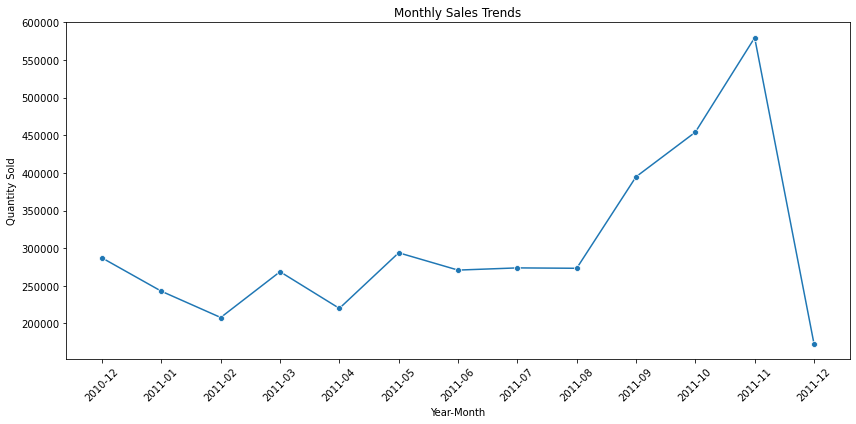

In [20]:
#Line Plot of Sales Over Time 
#Track sales trends over time, such as monthly or quarterly sales.


# Create year-month column for easier grouping
revised_df['Date'] = pd.to_datetime(revised_df["Date"])
revised_df['Year-Month'] = revised_df['Date'].dt.to_period('M')

#Aggregate sales by Year-Month
monthly_sales = revised_df.groupby('Year-Month').agg({'Sales':'sum'}).reset_index()

# Convert 'Year-Month' back to string for plotting (necessary for x-axis labeling in seaborn/matplotlib)
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].astype(str)
monthly_sales

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Year-Month', y='Sales', marker='o')

plt.xticks(rotation=45)
plt.title('Monthly Sales Trends')
plt.xlabel('Year-Month')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()

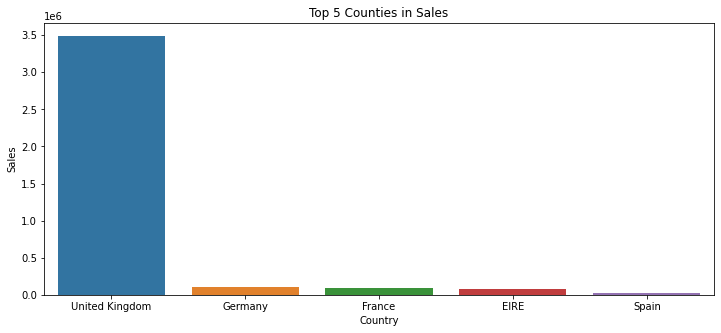

In [106]:
# Sales by country

country_sales = pd.DataFrame(revised_df.groupby("Country").sum()["Sales"])
sorted_country_sales = country_sales.sort_values(by='Sales', ascending=False).reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data= sorted_country_sales.head(5), x= "Country", y="Sales")
plt.title("Top 5 Counties in Sales")
plt.xlabel("Country")
plt.ylabel("Sales")
plt.show()


The United Kingdom dominates in sales and is the largest market for the business. The business' top markets include Germany, France, Eire(Ireland) and, Spain

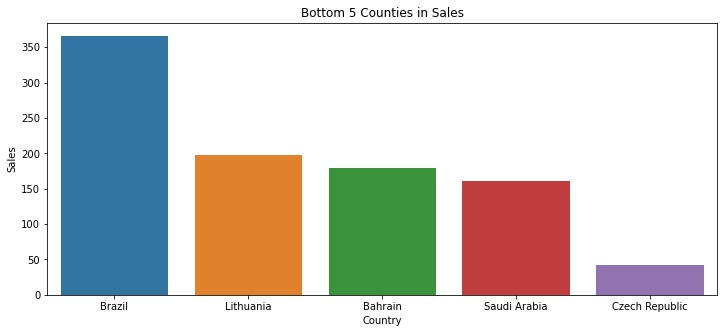

In [113]:
# Countries with the lowest sales
plt.figure(figsize=(12,5))
sns.barplot(data= sorted_country_sales.tail(5), x= "Country", y="Sales")
plt.title("Bottom 5 Counties in Sales")
plt.xlabel("Country")
plt.ylabel("Sales")
plt.show()

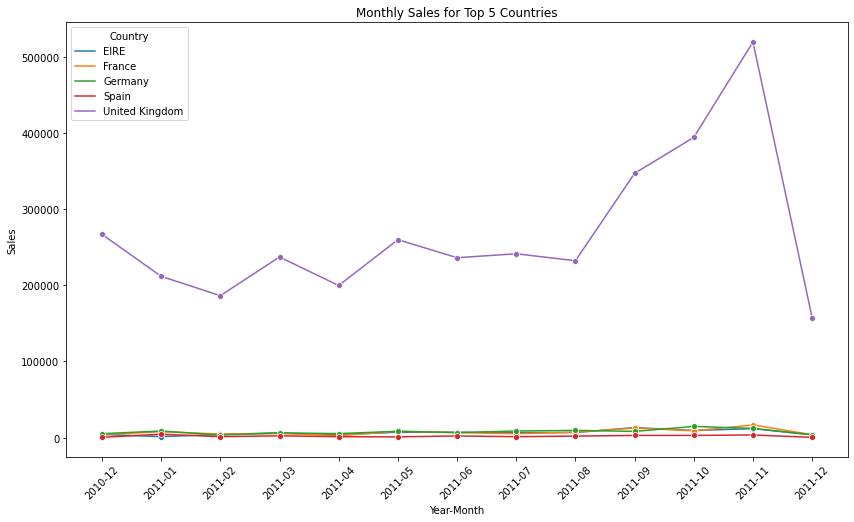

In [114]:
#sales trend by country
# Step 1: Aggregate sales by country to find the top 5

total_sales_by_country = revised_df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(5)

# Step 2: Filter the dataset for just the top 5 countries
top_countries = total_sales_by_country.index.tolist()


filtered_df = revised_df[revised_df['Country'].isin(top_countries)]

# Step 4: Aggregate sales over time for these countries
sales_over_time = filtered_df.groupby(['Year-Month', 'Country'])['Sales'].sum().reset_index()

sales_over_time['Year-Month'] = sales_over_time['Year-Month'].astype(str)
# Step 5: Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=sales_over_time, x='Year-Month', y='Sales', hue='Country', marker='o')

# Beautify the plot
plt.title('Monthly Sales for Top 5 Countries')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Country')

plt.show()


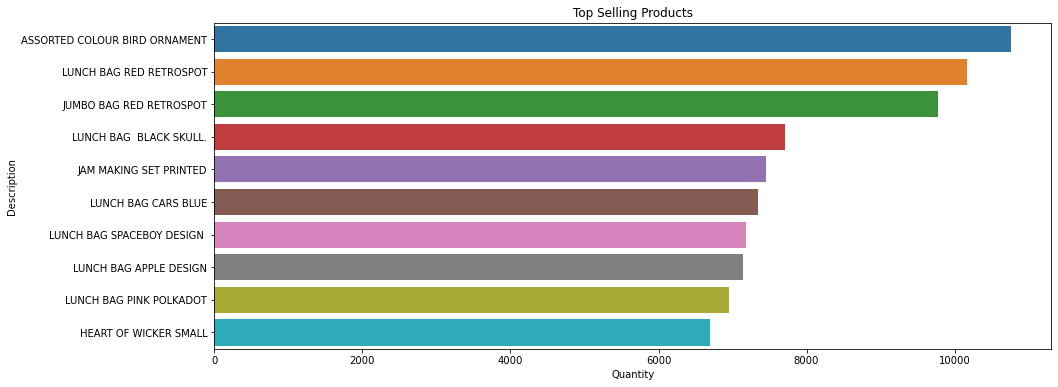

In [104]:
# Top selling Products by Quantity
best_sellers = revised_df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(15,6))
sns.barplot(data = best_sellers, y = "Description", x = "Quantity")
plt.xlabel("Quantity") 
plt.ylabel("Description")
plt.title("Top Selling Products")
plt.show()

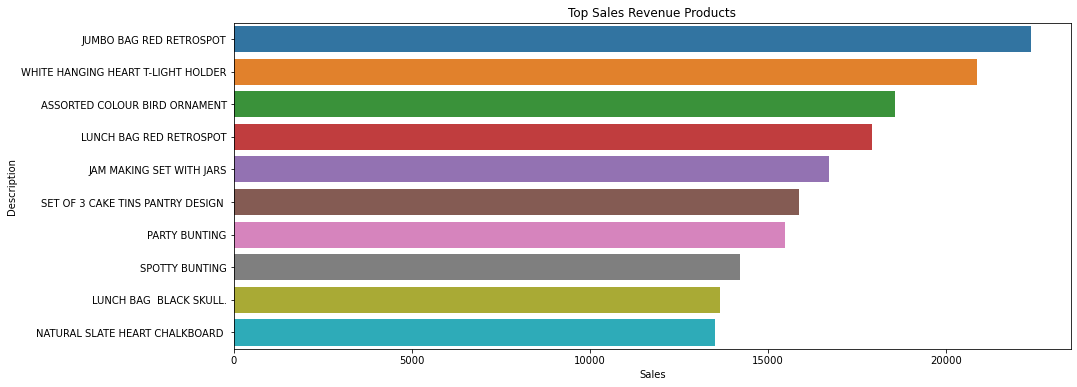

In [103]:
# Top Product by Sales(revenue)
best_sales_products = revised_df.groupby("Description")["Sales"].sum().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(15,6))
sns.barplot(data = best_sales_products, y = "Description", x = "Sales")
plt.xlabel("Sales") 
plt.ylabel("Description")
plt.title("Top Sales Revenue Products")
plt.show()


<AxesSubplot:>

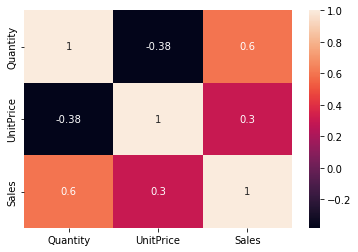

In [83]:
# Relationship between unit price and quantity sold
rel = revised_df.corr()
sns.heatmap(rel, annot=True)

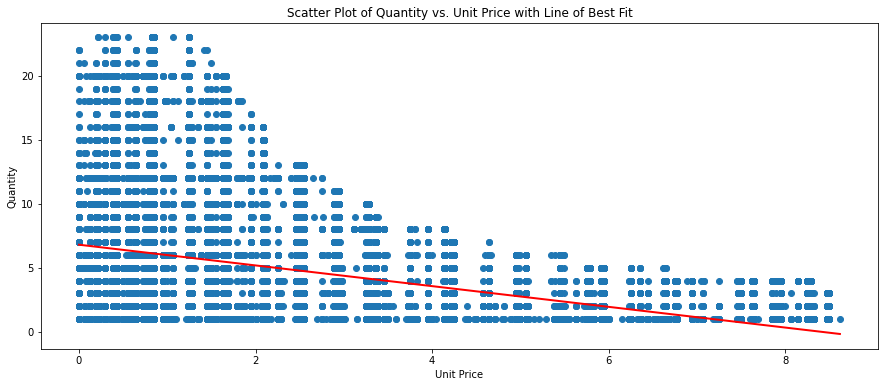

In [90]:
plt.figure(figsize=(15,6))
plt.scatter(data = revised_df, x = "UnitPrice", y = "Quantity")

# Calculate the line of best fit
slope, intercept = np.polyfit(revised_df['UnitPrice'], revised_df['Quantity'], 1)

# Create x values for the line of best fit: from min to max of UnitPrice
x_vals = np.array([revised_df['UnitPrice'].min(), revised_df['UnitPrice'].max()])

# Calculate corresponding y values based on the slope and intercept
y_vals = slope * x_vals + intercept

# Plot line of best fit
plt.plot(x_vals, y_vals, color="red", linewidth=2)

# Labeling the plot
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.title('Scatter Plot of Quantity vs. Unit Price with Line of Best Fit')

plt.show()

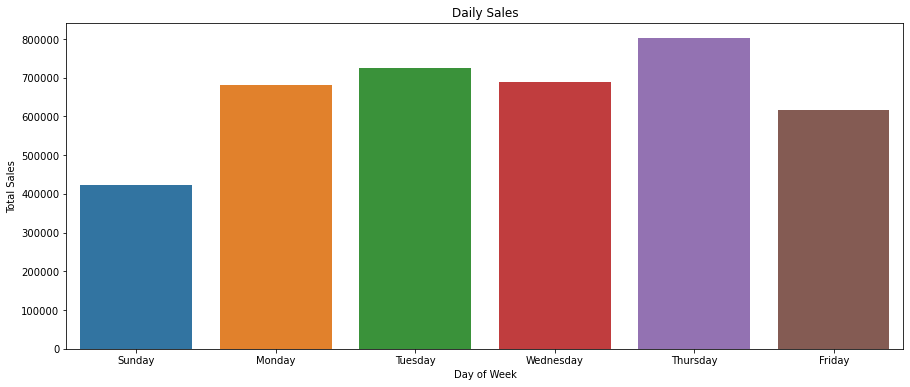

In [102]:
#Sales performance by day of the week
revised_df["Day"] = revised_df["Date"].dt.day_name()

#calculate daily saless
daily_sales = revised_df.groupby("Day").agg({'Sales': "sum"}).sort_values("Sales", ascending=False).reset_index()
#daily_sales

# plot sales by day 
plt.figure(figsize=(15,6))
sns.barplot(data = daily_sales, x = "Day", y = "Sales", order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title("Daily Sales")
plt.xlabel("Day of Week")
plt.ylabel("Total Sales")
plt.show()


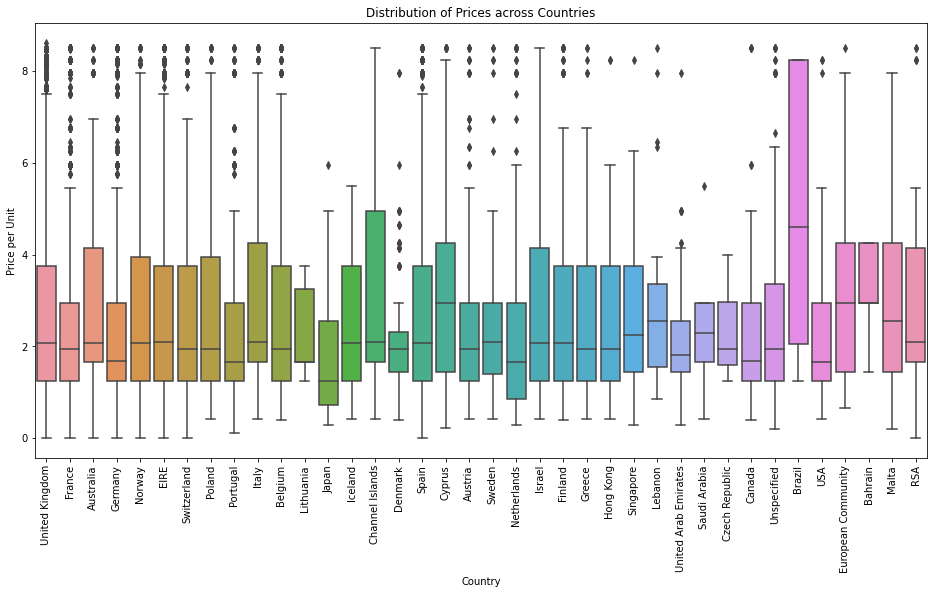

In [112]:
# Distribution of price across countries

plt.figure(figsize=(16,8))
sns.boxplot(data=revised_df, x = "Country", y = "UnitPrice")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Price per Unit")
plt.title("Distribution of Prices across Countries")
plt.show()